In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import accuracy_score

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


In [2]:
# Define the feedforward neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [3]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 2.0366 - accuracy: 0.2309
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9449 - accuracy: 0.2741
Epoch 3/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.9195 - accuracy: 0.2850
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9052 - accuracy: 0.2926
Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.8926 - accuracy: 0.3000
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8857 - accuracy: 0.3058
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8769 - accuracy: 0.3041
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8728 - accuracy: 0.3117
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8674 - accuracy: 0.3122
Epoch 10/10
1563/1563 [==============================] - 11s 7ms/step - l

In [5]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.8498 - accuracy: 0.3306
Test accuracy: 0.33059999346733093


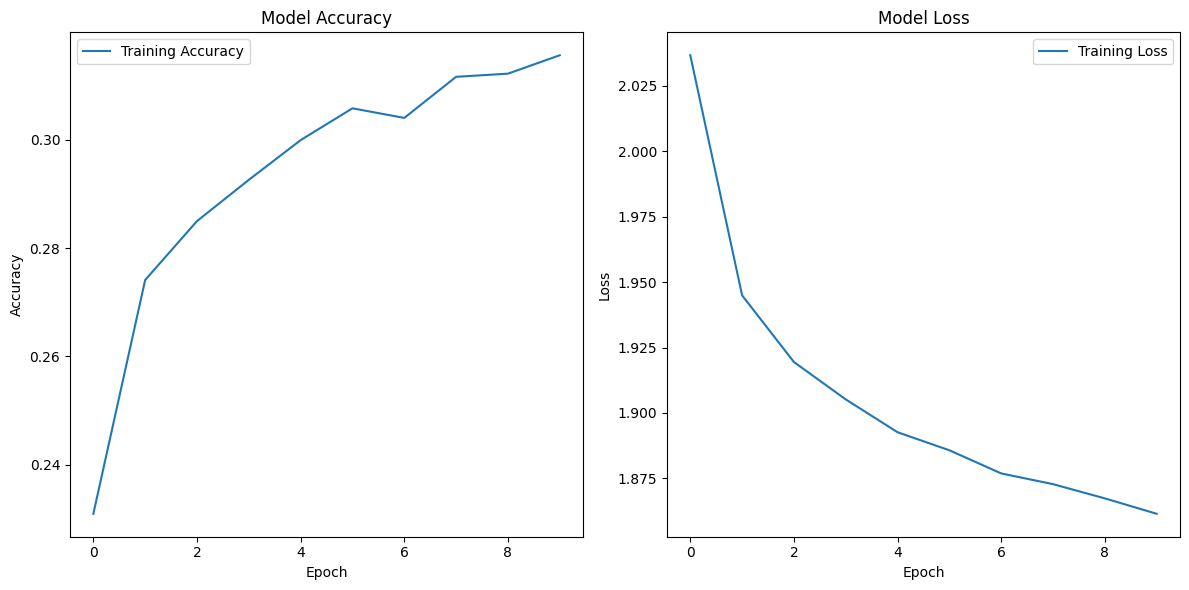

In [8]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
#plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()